![](https://i.imgur.com/1EzyZvj.png)


> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets

In [1]:
!pip install plotly matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [184]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# The following settings will improve the default style and font sizes for our charts.

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
# Loading Data into a pandas dataframe
medical_df = pd.read_csv('medical.csv')

In [4]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer. 

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

Let's check the data type for each column.

In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" ([body mass index](https://en.wikipedia.org/wiki/Body_mass_index)) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.


Inferences drawn by looking at the table above?
1. Definitely some ouliers in the charges column as the meadian is very less than maximum.
2. Almost half of the population does not have any children
3. On average people are overweight
4. Company has no clients of under 18 years of age
5. Company has no clients over the age of 64



## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot.

In [7]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [8]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages.

There are over twice as many customers with ages 18 and 19, it can be because the cost for insurance be lower for young people and the company might have a minimum age bar for insurance.


### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [9]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)

The Distribution of ages forms a uniform distribution while the distribution of BMIs forms a gaussian distribution?

Since BMI is an attribute of an individual and it is usually used as a measure of a person's health the company might be charging more for insurance to people who are overweight and underweight. Age has a uniform distribution as the company might be offering a lower cost of insurance for people under 20 years of age and it might also be the minimum age bar so as soon as people turn 18 they might be inclined to get an insurance, so for people above the age of 20 the population distribution seems almost uniform.

### Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers using the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [11]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Observations from the above graph:

* For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \$7300, the median for smokers is close to \$35,000.


In [80]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [81]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'grey','yellow','blue'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [82]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='children', 
                   color_discrete_sequence=['green', 'grey','blue','cyan','red','black'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

It seems people who have children has a higher ratio of population in the insurance clients list but still their average medical charges are lower. We can conclude that people having children generally have a healthier lifestyle.

### Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [83]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [84]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke.



Visualizing the distributions of the "sex", "region" and "children" columns. 

In [85]:
px.histogram(medical_df, x='sex', title='Gender')

In [86]:
px.histogram(medical_df, x='region', title='Region')

In [87]:
px.histogram(medical_df, x='children', title='Number of Children')

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [88]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     
Among smokers there seems to be two equally populated clusters which might indicate two groups, light and heavy smokers. 

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [89]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

In [90]:
fig = px.violin(medical_df, 
                 x='children', 
                 y='charges', 
                 title='Children vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [91]:
fig = px.violin(medical_df, 
                 x='region', 
                 y='charges', 
                 title='Region vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

/home/ajit/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'smoker vs charges')]

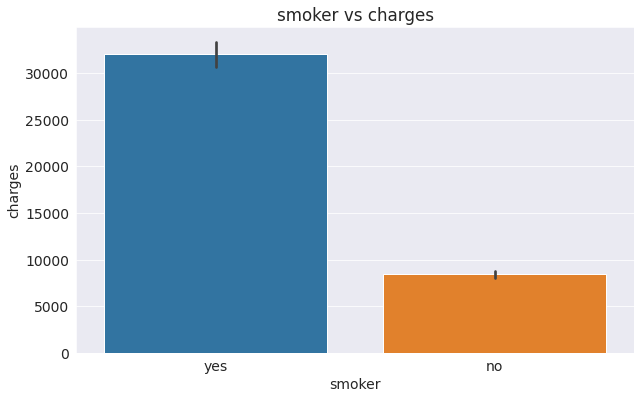

In [24]:
sns.barplot(medical_df['smoker'],medical_df['charges']).set(title='smoker vs charges')

/home/ajit/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'sex vs charges')]

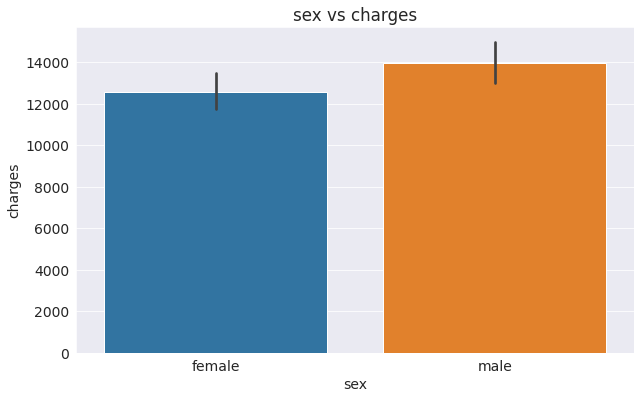

In [25]:
sns.barplot(medical_df['sex'],medical_df['charges']).set(title='sex vs charges')

### Correlation

We can see from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [26]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [27]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [28]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [29]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.

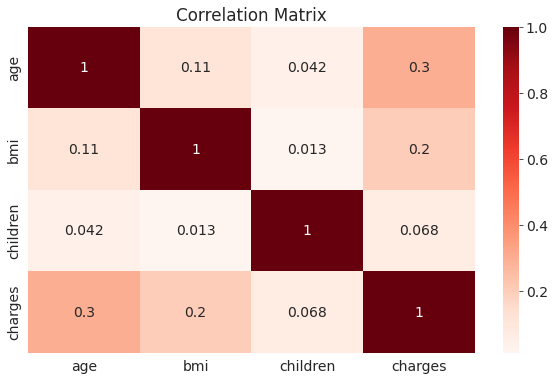

In [30]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [31]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

Next, let's visualize the relationship between "age" and "charges"

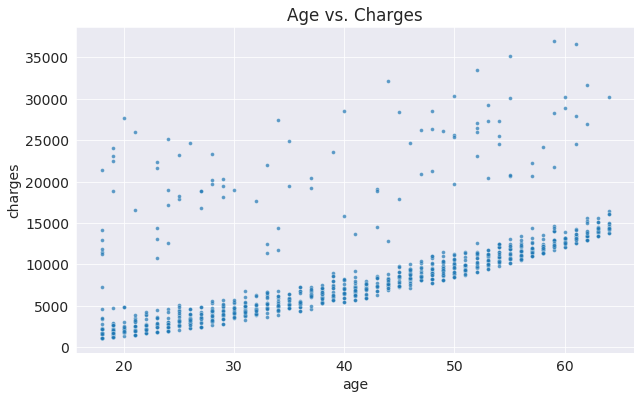

In [32]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

### Linear Regression using Scikit-learn

First, we create a new model object.

In [42]:
# Initializing a Linear Regression model
model = LinearRegression()

In [43]:
# Defining inputs (Parameters) and tagets
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

In [44]:
# Fitting the model
model.fit(inputs, targets)

LinearRegression()

In [45]:
predictions = model.predict(inputs)

In [51]:
from sklearn.metrics import mean_squared_error

In [56]:
# RMSE loss to evaluate the model.
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

4662.505766636395


Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [59]:
# w
weight = model.coef_
weight

array([267.24891283])

In [60]:
# b
bias = model.intercept_
bias

-2091.4205565650864

Let's visualize the line created by the above parameters.

In [61]:
def line(x,w,b):
    return w*x + b

In [76]:
new = 
type(inputs)

pandas.core.frame.DataFrame

In [77]:
model_line = line(inputs['age'],weight, bias)

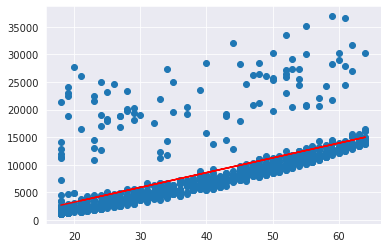

In [79]:
plt.scatter(inputs, targets)
plt.plot(inputs, model_line,'r')

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers. 

Using the [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) class from `scikit-learn` to train a model using the stochastic gradient descent technique. Make predictions and compute the loss.

In [92]:
# Initializing the Stichastic Gradient Descent Regressor Model 

SGD_reg = SGDRegressor()

In [93]:
# Fitting the model

SGD_reg.fit(inputs, targets)

SGDRegressor()

In [94]:
# making predictions using the model
predictions = SGD_reg.predict(inputs)

In [96]:
# Evaluating the models using RMSE loss function

x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

4718.4355067377655


Now doing the same for smokers

In [103]:
# Creating a new dataframe containing data of smokers

smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [104]:
# Storing the imputs and target values
inputs = smoker_df[['age']]
targets = smoker_df.charges

print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (274, 1)
targes.shape : (274,)


In [105]:
# Initializing Linear Regression model

model = LinearRegression()

In [106]:
# Fitting the model

model.fit(inputs, targets)

LinearRegression()

In [107]:
# Making predictions using the model

predictions = model.predict(inputs)

In [108]:
# Evaluating the model

x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

10711.00334810241


Now making predictions using Stochastic Gradient Descent Regressoion

In [115]:
# Initializing Stochastic Gradient Descent Regressor model

SDG = SGD_reg = SGDRegressor()

# Fitting the model

SDG.fit(inputs, targets)

# Making predictions using the model

predictions = SDG.predict(inputs)

# Evaluating the model

x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)


4954.711318164537


## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [116]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print('Loss:', rmse)

Loss: 4662.3128354612945


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [117]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [118]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.

In [119]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

You can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss. 

Let's also check the parameters of the model.

In [120]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

Clearly, BMI has a much lower weightage, and you can see why. It has a tiny contribution, and even that is probably accidental. This is an important thing to keep in mind: you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply. 

Training a linear regression model to estimate charges using BMI alone.

In [121]:
inputs, targets = non_smoker_df[['bmi']], non_smoker_df.charges

In [123]:
# Initializing Linear Regression model

lin_reg = LinearRegression()

# Fitting the model
lin_reg.fit(inputs, targets)

# Making predictions using model
predictions = lin_reg.predict(inputs)

# Evaluating the model using root mean square error
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)


5969.772531913293


Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [124]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [125]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [127]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

4608.470405038247


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.

Repeating the same process for smokers

In [130]:
# Create inputs and targets
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

5718.202480524154


Repeating above steps for all the population

In [132]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

11355.317901125973


## Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".


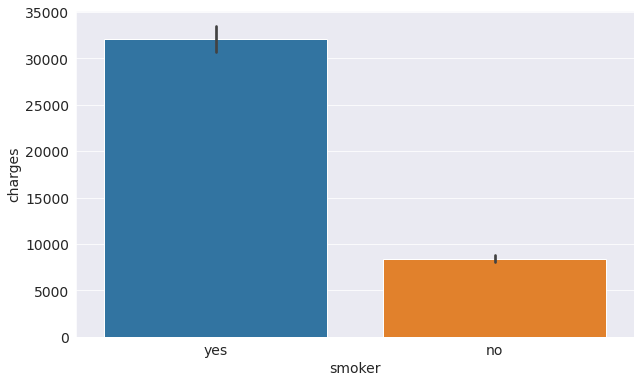

In [168]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [141]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [142]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [143]:
medical_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,1
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,1.0,0


We can now use the `smoker_df` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [144]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

6056.439217188081


The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

<AxesSubplot:xlabel='sex', ylabel='charges'>

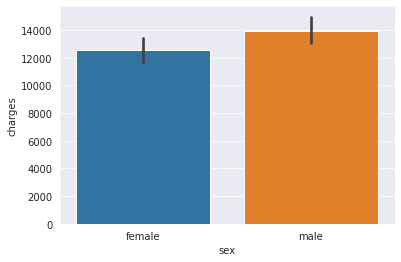

In [145]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [146]:
sex_codes = {'female': 0, 'male': 1}

In [147]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [148]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [149]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

6056.100708754546


As you might expect, this does have a significant impact on the loss.


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)


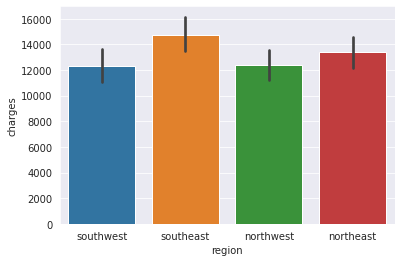

In [150]:
sns.barplot(data=medical_df, x='region', y='charges');

In [151]:
# Initializing One Hot Encoding

enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [152]:
# Using One Hot Encoding to transform the data

one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [153]:
# Insering One Hot Encoded data into main dataframe
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [154]:
medical_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,1.0,0,0


Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [161]:
# Using the whole population


# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']



# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

6041.6796511744515


Once again, this leads to a fairly small reduction in the loss. 

In [162]:
# For Smokers

input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
smoker_df = medical_df[medical_df['smoker_code'] == 1]
inputs, targets = smoker_df[input_cols], smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

5668.4678821121515


In [163]:
# For non-smokers

input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
non_smoker_df = medical_df[medical_df['smoker_code'] == 0]
inputs, targets = non_smoker_df[input_cols], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

4573.074988795492


It seems two seperate models give a lower rmse.

## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model. 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 

In [164]:
model.coef_

array([ 2.64481438e+02,  1.89804618e+01,  5.87458257e+02, -1.13686838e-13,
       -5.25970487e+02,  7.33683019e+02,  1.85554256e+02, -2.58365372e+02,
       -6.60871903e+02])

In [165]:
model.intercept_

-2940.747154556304

In [166]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,2.644814e+02
1,bmi,1.898046e+01
2,children,5.874583e+02
3,smoker_code,-1.136868e-13
4,sex_code,-5.259705e+02
5,northeast,7.336830e+02
6,northwest,1.855543e+02
7,southeast,-2.583654e+02
8,southwest,-6.608719e+02
9,1,-2.940747e+03


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [167]:
medical_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,1.0,0,0


In [174]:
# Initializing Scaler object from sklearn preprocessing

numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [175]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [176]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

We can now scale data as follows:

In [177]:
# Using scaler object to transform (scale ) the data 

scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

These can now we combined with the categorical data

In [178]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [180]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

6041.6796511744515


We can now compare the weights in the formula:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [181]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


The most important feature are:

1. Smoker
2. Age
3. BMI


Splitting the data and training the model on training data and evaluating on test data

In [183]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [185]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

6041.6796511744515


Let's compare this with the training loss.

In [186]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
x = mean_squared_error(targets, predictions)
rmse = np.sqrt(x)
print(rmse)

6041.6796511744515
